## Carregando a base de dados e fazendo análises estatísticas iniciais

In [19]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [20]:
# Carregando a base de dados
df = pd.read_csv("data/br_ms_atencao_basica_municipio.csv")

In [21]:
# Verificando as 5 primeiras linhas 
df.head()

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica
0,2007,7,AC,1200401,120040,314127,0.00,0.00,0,0,38,38,131100,41.73,131100,41.73
1,2007,8,AC,1200401,120040,314127,23.40,30.90,23,0,40,63,138000,43.93,208200,66.28
2,2007,9,AC,1200401,120040,314127,22.60,29.40,23,0,40,63,138000,43.93,205800,65.51
3,2007,10,AC,1200401,120040,314127,21.93,29.90,22,0,40,62,138000,43.93,203790,64.88
4,2007,11,AC,1200401,120040,314127,22.70,34.65,23,0,40,63,138000,43.93,206100,65.61


In [22]:
# Vendo as informações da base, como tipo de dados das colunas e quantos valores presentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901944 entries, 0 to 901943
Data columns (total 16 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   ano                                                  901944 non-null  int64  
 1   mes                                                  901944 non-null  int64  
 2   sigla_uf                                             901944 non-null  object 
 3   id_municipio                                         901944 non-null  int64  
 4   id_municipio_6                                       901944 non-null  int64  
 5   populacao                                            901944 non-null  int64  
 6   carga_horaria_medica_atencao_basica_tradicional      901944 non-null  float64
 7   carga_horaria_enfermagem_atencao_basica_tradicional  901944 non-null  float64
 8   quantidade_equipes_atencao_basica_equivalente        9

In [23]:
# Verificando se existem valores nulos
df.isna().sum()

ano                                                    0
mes                                                    0
sigla_uf                                               0
id_municipio                                           0
id_municipio_6                                         0
populacao                                              0
carga_horaria_medica_atencao_basica_tradicional        0
carga_horaria_enfermagem_atencao_basica_tradicional    0
quantidade_equipes_atencao_basica_equivalente          0
quantidade_equipes_atencao_basica_parametrizada        0
quantidade_equipes_saude_familia                       0
quantidade_equipes_atencao_basica_total                0
populacao_coberta_estrategia_saude_familia             0
proporcao_cobertura_estrategia_saude_familia           0
populacao_coberta_total_atencao_basica                 0
proporcao_cobertura_total_atencao_basica               0
dtype: int64

In [24]:
# Como a base ficou muito grande, verificando quais anos estão cobertos para analisar um possível corte
df["ano"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020])

In [25]:
# Verificando se todas as unidades federativas brasileiras estão na base
df["sigla_uf"].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [26]:
# Primeiro recorte da base. Foi feito para facilitar a manipulação dos dados
df_novo = df[(df["ano"] > 2015)]
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334200 entries, 22646 to 901943
Data columns (total 16 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   ano                                                  334200 non-null  int64  
 1   mes                                                  334200 non-null  int64  
 2   sigla_uf                                             334200 non-null  object 
 3   id_municipio                                         334200 non-null  int64  
 4   id_municipio_6                                       334200 non-null  int64  
 5   populacao                                            334200 non-null  int64  
 6   carga_horaria_medica_atencao_basica_tradicional      334200 non-null  float64
 7   carga_horaria_enfermagem_atencao_basica_tradicional  334200 non-null  float64
 8   quantidade_equipes_atencao_basica_equivalente        33

In [27]:
# Exibindo as principais métricas descritivas das colunas nuéricas da base, como por exemplo o desvio padrão, média e quartis.
df_novo.describe().T

,count,mean,std,min,25%,50%,75%,max
ano,334200.0,2.018000e+03,1.414216,2016.0,2017.00,2018.00,2019.000,2020.0
mes,334200.0,6.500000e+00,3.452058,1.0,3.75,6.50,9.250,12.0
id_municipio,334200.0,3.253591e+06,984823.396808,1100015.0,2512101.00,3146280.00,4119202.000,5300108.0
id_municipio_6,334200.0,3.253586e+05,98482.339616,110001.0,251210.00,314627.50,411920.000,530010.0
populacao,334200.0,3.723158e+04,218478.359135,781.0,5468.00,11586.00,25216.000,12252023.0
carga_horaria_medica_atencao_basica_tradicional,334200.0,1.928854e+00,15.255219,0.0,0.00,0.33,1.160,1230.2
carga_horaria_enfermagem_atencao_basica_tradicional,334200.0,2.775089e+00,18.574134,0.0,0.00,1.00,2.005,1424.5
quantidade_equipes_atencao_basica_equivalente,334200.0,1.486302e+00,14.997363,0.0,0.00,0.00,0.000,1230.0
quantidade_equipes_atencao_basica_parametrizada,334200.0,1.033184e-01,1.560480,0.0,0.00,0.00,0.000,158.0
quantidade_equipes_saude_familia,334200.0,7.636320e+00,27.696550,0.0,2.00,4.00,7.000,1453.0


## Análise descritiva dos dados com gráficos

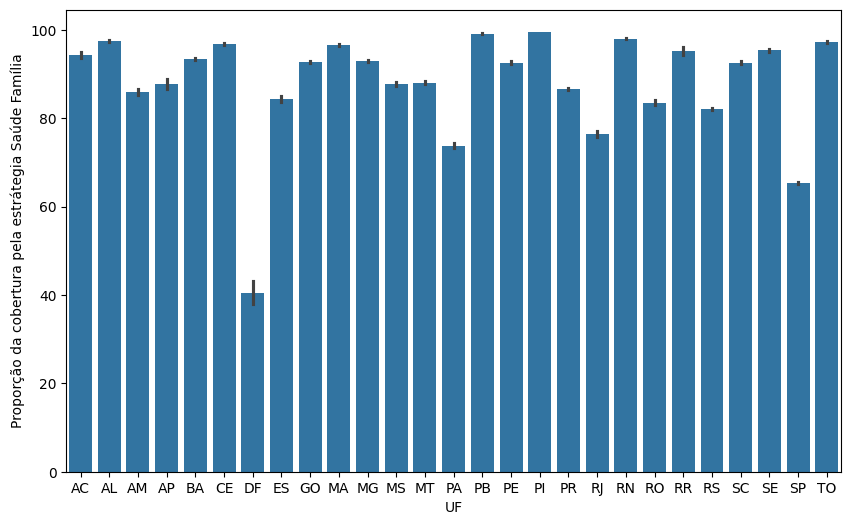

In [39]:
# Exemplo de gráfico com Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="sigla_uf", y="proporcao_cobertura_estrategia_saude_familia", data=df_novo)
# # Customizar o eixo Y para mostrar valores em milhares
# formatter = FuncFormatter(lambda x, _: f'{x/1000:.0f}')
# ax.yaxis.set_major_formatter(formatter)

# # Ajustar as labels do eixo X, caso necessário
# plt.xticks(rotation=90)

plt.xlabel('UF')
plt.ylabel('Proporção da cobertura pela estrátegia Saúde Família')
plt.show()


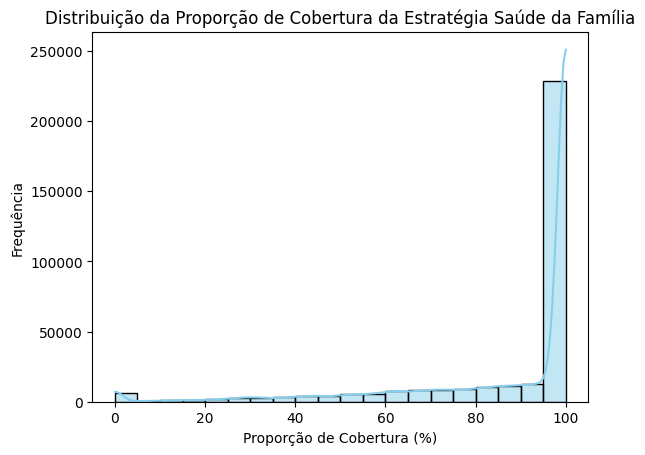

In [29]:
# Plotando o histograma
sns.histplot(df_novo['proporcao_cobertura_estrategia_saude_familia'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição da Proporção de Cobertura da Estratégia Saúde da Família')
plt.xlabel('Proporção de Cobertura (%)')
plt.ylabel('Frequência')
plt.show()


/var/folders/7d/bsg2h_vs7t11dqc8789wpwhm0000gn/T/ipykernel_654/2995116800.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_novo['ano'], y=df_novo['carga_horaria_medica_atencao_basica_tradicional'], palette='coolwarm')


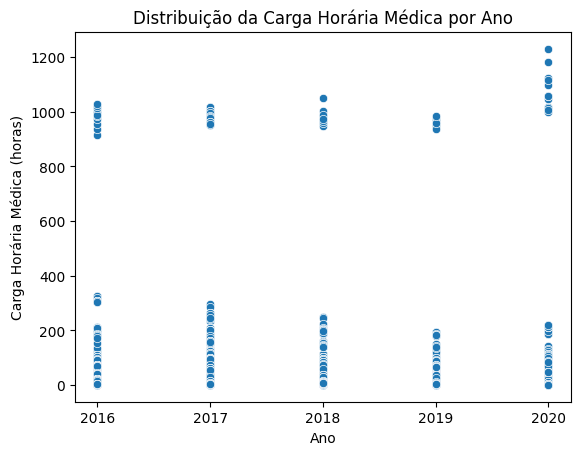

In [41]:
# Boxplot da carga horária médica por ano
sns.scatterplot(x=df_novo['ano'], y=df_novo['carga_horaria_medica_atencao_basica_tradicional'], palette='coolwarm')
plt.title('Distribuição da Carga Horária Médica por Ano')
plt.xlabel('Ano')
plt.xticks([2016,2017,2018,2019,2020])
plt.ylabel('Carga Horária Médica (horas)')
plt.show()


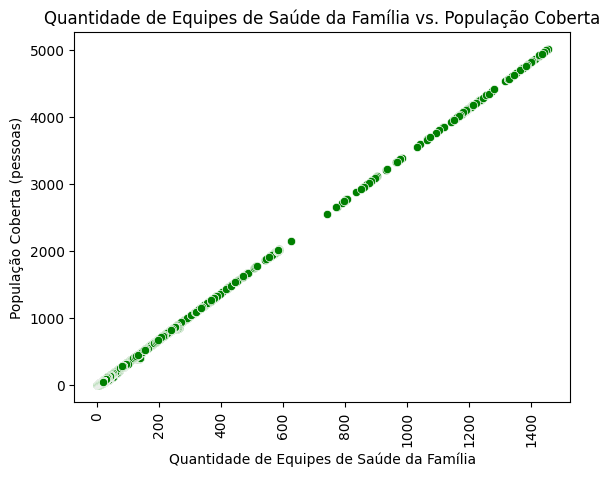

In [42]:
# Scatter plot entre equipes de saúde da família e população coberta
ax = sns.scatterplot(x=df_novo['quantidade_equipes_saude_familia'], y=df_novo['populacao_coberta_estrategia_saude_familia'], color='green')
# Customizar o eixo Y para mostrar valores em milhares
formatter = FuncFormatter(lambda x, _: f'{x/1000:.0f}')
ax.yaxis.set_major_formatter(formatter)

# Ajustar as labels do eixo X, caso necessário
plt.xticks(rotation=90)
plt.title('Quantidade de Equipes de Saúde da Família vs. População Coberta')
plt.xlabel('Quantidade de Equipes de Saúde da Família')
plt.ylabel('População Coberta (pessoas)')
plt.show()


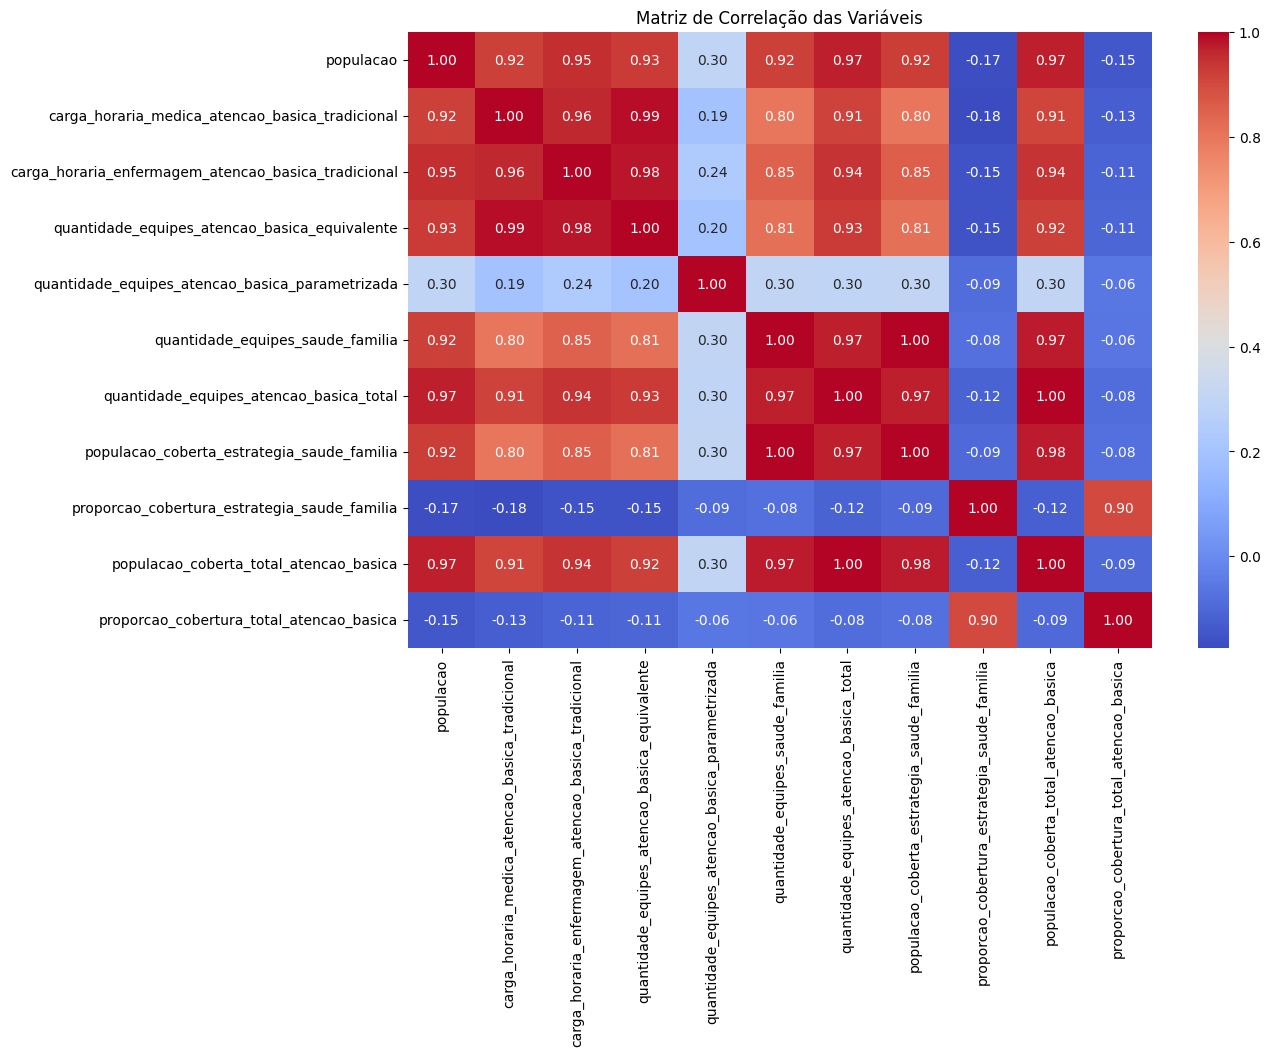

In [33]:
# Criando um dataframe somente com as colunas numéricas para fazer um heatmap com a correlação entre elas
df_numericas = df.drop(labels=["ano","mes","sigla_uf","id_municipio","id_municipio_6"], axis=1)

# Calculando a correlação entre as variáveis
correlation_matrix = df_numericas.corr()

# Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação das Variáveis')
plt.show()


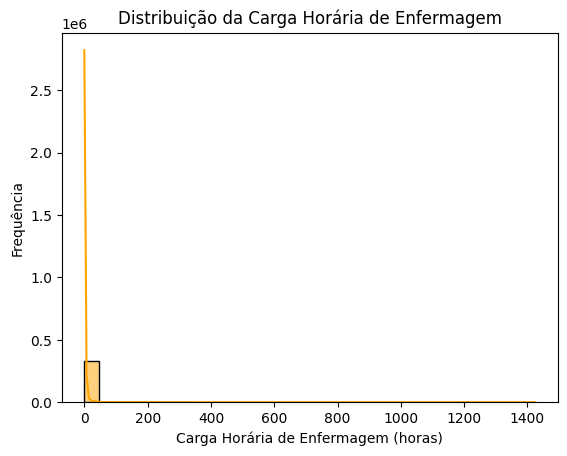

In [34]:
# Plotando o histograma da carga horária de enfermagem
sns.histplot(df_novo['carga_horaria_enfermagem_atencao_basica_tradicional'], kde=True, bins=30, color='orange')
plt.title('Distribuição da Carga Horária de Enfermagem')
plt.xlabel('Carga Horária de Enfermagem (horas)')
plt.ylabel('Frequência')
plt.show()


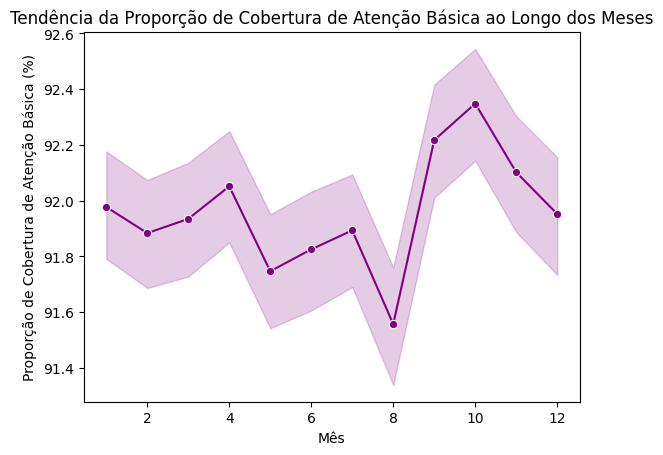

In [35]:
# Gráfico de linha da proporção de cobertura total de atenção básica por mês
sns.lineplot(x=df_novo['mes'], y=df_novo['proporcao_cobertura_total_atencao_basica'], marker='o', color='purple')
plt.title('Tendência da Proporção de Cobertura de Atenção Básica ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Proporção de Cobertura de Atenção Básica (%)')
plt.show()


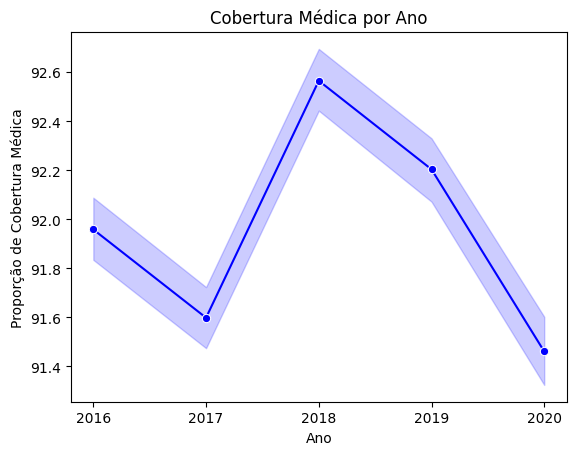

In [44]:
# # Boxplot da proporção de cobertura total de atenção básica por ano
# sns.boxplot(x=df_novo['ano'], y=df_novo['proporcao_cobertura_total_atencao_basica'], palette='Set2')
# plt.title('Proporção de Cobertura de Atenção Básica por Ano')
# plt.xlabel('Ano')
# plt.ylabel('Proporção de Cobertura (%)')
# plt.show()

# Gráfico de linha
sns.lineplot(x=df_novo["ano"], y=df_novo['proporcao_cobertura_total_atencao_basica'], marker='o', color='b')
plt.title('Cobertura Médica por Ano')
plt.xlabel('Ano')
plt.xticks([2016,2017,2018,2019,2020])
plt.ylabel('Proporção de Cobertura Médica')
plt.show()


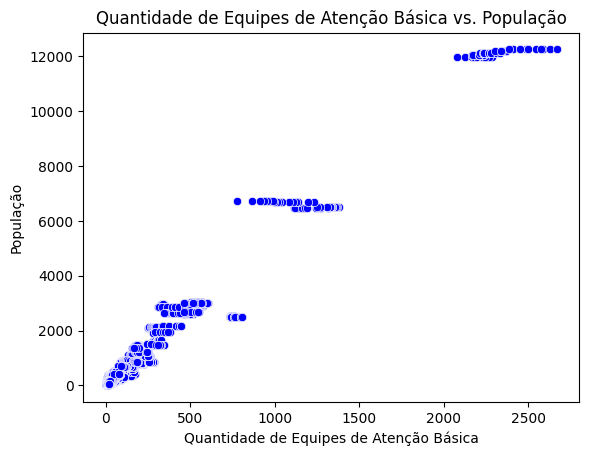

In [37]:
# Scatter plot entre quantidade de equipes de atenção básica e população
ax = sns.scatterplot(x=df_novo['quantidade_equipes_atencao_basica_total'], y=df_novo['populacao'], color='blue')
# Customizar o eixo Y para mostrar valores em milhares
formatter = FuncFormatter(lambda x, _: f'{x/1000:.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.title('Quantidade de Equipes de Atenção Básica vs. População')
plt.xlabel('Quantidade de Equipes de Atenção Básica')
plt.ylabel('População')
plt.show()
